# Collatz 
- Code By Michael Sherif Naguib
- license: MIT open source
- Date: 5/15/19
- @University of Tulsa
- Description: Updating Old Code with new techniques! 

In [5]:
%matplotlib notebook
#imports
from NumLib import PlotUtil # see https://github.com/Michael-Naguib/NumLib       (side note: this has A LOT of big imports... be patient)
import numpy as np
import random
import math
import sys
import bisect
import tqdm
import multiprocessing as mp

In [6]:
#Stores the memoized values for memoized_collatz(n)
#NOTE! AS these values are saved between runs... if there is an error in the functions
#      which place values in these... it may cause an improper value to be stored...
collatz_cache={}
collatz_sequences_cache={1:[1]}
collatz_sequence_length_cache={1:1,0:0}

In [7]:
#Collatz function:
def collatz(n):
    r=n/2# more efficient than % edge case 0
    if r==n//2:
        return r
    else:
        return 3*n + 1

#Memoizes Collatz values computation:
def memoized_collatz(n):
    if n in collatz_cache:
        return collatz_cache[n]
    else:
        result = collatz(n)
        collatz_cache[n]=result
        return result

In [8]:
#WARNING! although these memoized versions have a benifit by not having to do as many computations
#         if the path length is unique and exceeds python's max recursive depth they will error...

#The Collatz sequence progression from n --> 1 (inclusive of each): returns the sequence as a list
def collatz_sequence(n):
    all_nums = [n]   
    num = n
    while(num != 1):
        num = memoized_collatz(num)
        all_nums.append(int(num))
    return all_nums

#Memoizes Sequences .... sequence progression from n --> 1 (inclusive of each): returns the sequence as a list
def memoized_collatz_sequence(n):
    if n in collatz_sequences_cache:
        return collatz_sequences_cache[n]
    else:
        all_nums=[n]
        all_nums = all_nums + memoized_collatz_sequence(memoized_collatz(n))
        return all_nums
    
#Memoizes the sequence Length ... more memory efficient.... 
def memoized_collatz_sequence_length(n):
    if n in collatz_sequence_length_cache:
        return collatz_sequence_length_cache[n]
    else:
        result = 1+ memoized_collatz_sequence_length(memoized_collatz(n))
        collatz_sequence_length_cache[n] = result
        return result

In [9]:
#Settings
NUM_OF_POINTS=100000#int(math.pow(10,5))

#Create the x axis values
x = np.array(list(range(NUM_OF_POINTS)))

#What this does: maps a range same as the x axis to its path length then converts to a numpy array... tqdm logs progress...
y = np.array(list(map(lambda x : memoized_collatz_sequence_length(x),tqdm.tqdm(range(NUM_OF_POINTS)))))


100%|██████████████████████████████| 100000/100000 [00:00<00:00, 181089.01it/s]


In [6]:
memoized_collatz_sequence(100)

[100,
 50.0,
 25.0,
 76,
 38.0,
 19.0,
 58,
 29.0,
 88.0,
 44.0,
 22.0,
 11.0,
 34.0,
 17.0,
 52.0,
 26.0,
 13.0,
 40.0,
 20.0,
 10.0,
 5.0,
 16.0,
 8.0,
 4.0,
 2.0,
 1]

<IPython.core.display.Javascript object>


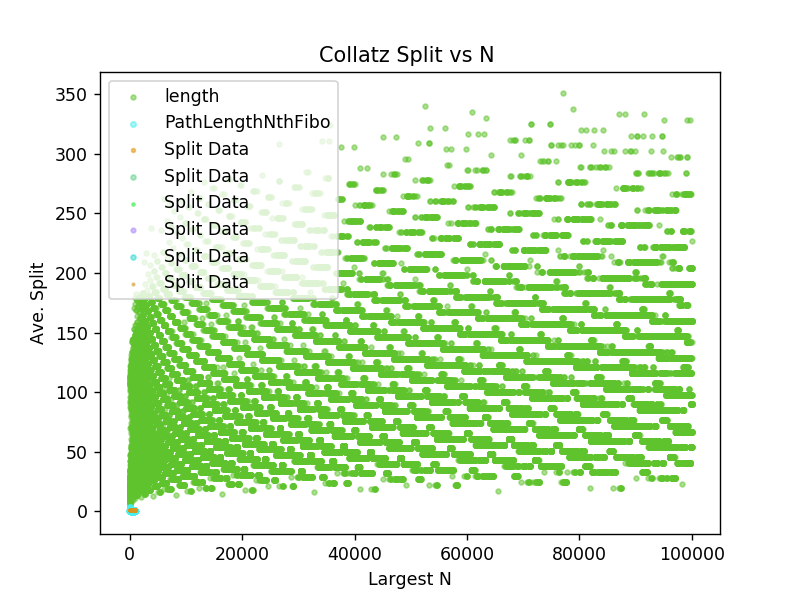

In [10]:
#Plot the data

#pu = PlotUtil.PlotUtil([x,y])
#pu.interactive_plot()
PlotUtil.PlotUtil.plot({'data':[x,y],"name":"length"},x_name="N", y_name="Sequence Length S(N)",title="Collatz Sequence Lengths S(N) vs N")

### Expiramentation

In [11]:
#Settings
NUM_OF_POINTS=1000#int(math.pow(10,5))
NUM_OF_POINTS_2=1000
#Fibonacci
phi = (1+math.sqrt(5))/2
fib_n = lambda n: math.floor((math.pow(phi,n)-1/math.pow(0-phi,n))/math.sqrt(5))

def test(n):
    return memoized_collatz_sequence_length(n)/(n if n!=0 else 1)

#Create the x axis values
x_2 = np.array(list(range(NUM_OF_POINTS)))
#What this does: maps a range same as the x axis to the function defined above then converts to a numpy array... 
#tqdm logs progress...
y_2 = np.array(list(map(lambda x : test(x),tqdm.tqdm(range(NUM_OF_POINTS)))))


100%|██████████████████████████████████| 1000/1000 [00:00<00:00, 333410.49it/s]


In [12]:
#PlotUtil.PlotUtil.plot({'data':[x_2,y_2],"name":"length"})
PlotUtil.PlotUtil.plotSeries([{"name":"PathLengthNthFibo","x":x_2,"y":y_2}],title="Test Func")
#PlotUtil.PlotUtil.plotSeries([{"name":"PathLengthNthFibo","x":x_2,"y":y_2},{"name":"collatz","x":x_3,"y":y_3}],title="Test Func")


### Collatz Tree 
> WARNING: this not even meant to be accedemic nor rigorous ... it might not even make sense at some points ... it is a quick jot down of a question i had ... rather a series of questions that i am trying to formulate... in essence this is my rough rough draft or even just intuition...

- Now i will interpret the collatz sequences as belonging to a tree
- A new memoized function will construct a tree appending each branch as a object list structure
- ``` {key: [paths which lead to that key]}```
- Note that n=log_k(d) where d is depth and n is number of nodes
- The goal is to look at the avg NodesPerLevel and then look at the distribution of levels ... to take the median of 
the depth distribution
- then compute     ``` k^n_actual = d_median  -->  k = root_n_actual(d_median)``` and compare that to k_mean and k_median... 
- The goal is to look at how different tree properties change as more nodes are added onto the tree....
- example... for x ∈ [1,n] what is k, d, d_median,k_medain etc....
- then look at x ∈ [1,n+j] where j ∈ Z+ and j!=0 (i.e j is a jump value... ) j could also be interpreted as time... as as the
tree grows considering this range.... what is j .... note technically i should just say j>n but all i really care about is that 
the next domain consideration is slightly larger...
- then after that is completed consider the path length itself as some sort of weight on a value where higher weights
have higher priority ... i am curious... put these in a queue and i think picking those items out in order then assembling that
tree structure might yeild a very interesting structure...   (note if enough time and processsing power it might be interesting to)
then grow the tree in that manner... note when i say grow the tree take 5 for example 5 goes 5 16 8 4 2 1 .... so as there
are 6 items inn its path 5 gets a weight of 6 --> say then 6 was the heighest weight .... pick from the remaining items in the
queue a number of items = to max(0,max_weight) .... and build the tree.... after growing the tree... i.e adding more values
at each time step what does the tree look like?
- IN GENERAL! --> there is a lot of potential in collatz for interpreting it as a tree structure.... 

#### Tree Class

In [13]:
#VERY basic tree class....
class TreeNode():
    def __init__(self,value):
        self.value = value
        self.children = []
    #Adds a Child to the node
    def addChild(self,otherNode):
        self.children.append(otherNode)
    #Searches Depth first for a value in a tree and if it is not found returns None
    def searchDepth(self,value):
        if self.value == value:
            return self
        else:
            loc = None
            for c in self.children:
                loc = c.searchDepth(value)
                if loc != None:
                    break
            return loc   
    #tree value structure...
    def structure(self):
        s = str({self.value:[c.structure() for c in self.children]})
        return s
    def __str__(self):
        return str(self.structure())
    def __lt__(self,other):
        return self.value < other.value
    def __gt__(self,other):
        return self.value > other.value
    def __eq__(self,other):
        return self.value == other.value
    def __le__(self,other):
        return self.value <= other.value
    def __ge__(self,other):
        return self.value >= other.value
    def preOrderTraversal(self,func):
        #preforms a preorder traversal calling the func on the node at the apprpiate time
        func(self)
        for child in self.children:
            child.preOrderTraversal(func)
        

##### Building the Tree Attempt 1

In [14]:
#Builds a subtree graph... sequentially....
def build_collatz_subtree(sequence):
    valueSet = set(sequence)
    root = TreeNode(sequence[len(sequence)-1])# sequence example 5 16 8 4 2 1 .... so generate backwards --> 1 first
    child = root
    for num in reversed(sequence[0:len(sequence)-1]):#cut off the last item...
        newNode= TreeNode(num)
        #print("{0} is a node of {1}".format(num,child.value))
        child.addChild(newNode)
        child=newNode
    return root 

In [15]:
#stores tree data
tree = TreeNode(1)
treeSet = set()
treeSet.add(1)

In [13]:
#Build the tree (NOTE! Relies on no duplicate calls and collatz_sequence_for(i) where i is constantally increasing)
def build_collatz_tree(add_sequence):
    #Determine if it is in the tree: what nodes do we actually need to add?
    items_not_already_in_tree=[]
    for item in add_sequence:
        if item in treeSet:
            items_not_already_in_tree.append(item)#append our root item... what will become root
            break
        else:
            treeSet.add(item)
            items_not_already_in_tree.append(item)
    if len(items_not_already_in_tree)>1: #prevents the case where the proposed root node was already in the tree
        #build subtree expects root item as last... which is what the above code does..
        #the root element is in the tree as well... 
        subtree = build_collatz_subtree(items_not_already_in_tree)
        #Find the node in the tree with the same value as the ndoe
        tree_insert_node_loc = tree.searchDepth(subtree.value)
        #Note the subtree (in collatz) each node only has one child --> add that one child ... (and thus)
        # the children of that child to the tree
        tree_insert_node_loc.addChild(subtree.children[0])
    

In [16]:
#Looks at the size of each level of the tree for computing the next path to be added to the tree 
#    NOTE! there is a lot of usefull code here that can do alot more than simply calculate levels... copy as need be...
def genLevelSizeData(tree):
    #print(str(tree))
    #Get the Levels of the tree: [[level 1],[[child 1 items],[child 2 items]],[level 3]]
    s = tree.structure()
    levels=[]
    t = [tree]
    while len(t)>0:
        currentLevel=[]
        #put all the top level nodes into the current level
        for node in t:
            currentLevel.append(node)
        #replace the current top level nodes with all the children from the previous set...
        v=[]
        for node in t:
            v = v + node.children
        levels.append(currentLevel)
        t = v
    #Convert the nodes to simply values
    levels = list(map(lambda level: list(map(lambda item: item.value,level)),levels))
    #print(str(tree)) #good test case building use  i ∈ [1,7] or [1,8] ... can verify manually....
    #print(str(levels))
    #Determine the length of the levels
    level_len = list(map(lambda level: len(level),levels))
    return level_len

In [17]:
levelData = []
#Build the tree
for i in range(1,1000):
    #print(memoized_collatz_sequence(i))
    build_collatz_tree(memoized_collatz_sequence(i))#utilizing global tree THUS RESET THE TREE BEFORE EACH RUN!
    #Generate the data
    levelData.append(genLevelSizeData(tree))#utilizing global tree which is passed here

NameError: name 'build_collatz_tree' is not defined

In [18]:
#Let the data Observation and Hypothesis testing BEGIN!
i=0
for level in levelData:
    m = max(level)
    if m !=1:
        print("{0}: max={1}".format(i,m))
    i+=1

#### Build Tree 2 

In [19]:
### Initilize a storage place for the tree
root = TreeNode(1)# 1 is C(2) ==> the last number in the colatz sequence
#Store reference to where that instance is located... 
found = {root.value: root}#edge case needed for the code to run


#Builds the tree by using the dictionary of references  'found' which point to the tree's nodes to 
#insert nodes into the tree
def build_collatz_tree_2(found,n):
    #calculate the sequence for the number n: list [n-->1] inclusive of n and 1 .... n=4 [4,2,1]
    s = collatz_sequence(n)
    
    #===== Build the subtree backwards ... 
    if n in found:
        return#i.e it was a redundant call we dont need to do anything.. 
    
    #otherwise .... like a stack put nodes in while s[i] is not in the found ...
    stack =  []#yes this is cheep... 
    i=0#include putting n on the stack
    while (s[i] not in found):# while s[i] not in found   
        #(note no bound checking for i because we are assuming collatz always returns... theoretically this is unknown)
        newNode = TreeNode(s[i])
        stack.insert(0,newNode)#insert the node note! the first is n...
        
        i+=1#increment i
    #NOW! the last value of i is the the index for s[i] where s[i] is in the found!
    #we need to form the links between our nodes then make sure a reference to them by value
    #is placed in the found list    
    #POP the stack... (technically just iterate through it 0 to n because we inserted at the front 0)
    prev = found[s[i]]# s[i] is known to be in found
    for j in range(0,len(stack)):
        #this is a child of previous
        prev.addChild(stack[j])
        #change what the previous is
        prev = stack[j]
        #add the node to found dict based on value
        found[stack[j].value] = stack[j]
        
   #end TREE and FOUND have been updated ... 
    
    
#NOW actually use the method to build the tree
for k in range(1,10):
    build_collatz_tree_2(found,k)
    
for n in root.children:
    print(str(n.value))

2


#### Build Tree 3

In [20]:
def build_c_tree3(found,n):#Where found is the dictionary of nodes and n is the number to calculate the sequence for then update the tree
    #calculate the sequence for n: inclusive of start and stop ... n-->1 [n....1]
    s = collatz_sequence(n)
    
    #Edge error case: the user called this func redundanly ... n is already in the tree
    if n in found:
        return
    
    #otherwise build the subtree: init the first 
    prev = TreeNode(n)
    found[n] = prev
    
    #iterate forwards building the chain
    for i in range(1,len(s)):#exclude the first... (handled by the init)
        if s[i] not in found: 
            newNode = TreeNode(s[i])
            #print(newNode)
            found[s[i]] = newNode
            newNode.addChild(prev)
            #print(prev)
            prev = newNode#change ref
        else:
            found[s[i]].addChild(prev)#append the entire subtree to the tree by linking it in found
            return#exit ... 
        

In [21]:
#================================ TESTING ===================================
root = TreeNode(1)
found = {root.value:root}# store Key: (value of tree item)  Value: Tree Node Reference

print( "ROOT:"+ str(root))
print("FOUND:"+ str(found))
build_c_tree3(found,5)
build_c_tree3(found,32)
print("FOUND KEYS:"+ str(found.keys()))
print( "ROOT:"+ str(root))

#YES! this works!!! the issue? ==> bisect did some weird operations when sorting that somehow created new references which
#messed up the code ... the 2 attempt may work!

ROOT:{1: []}
FOUND:{1: <__main__.TreeNode object at 0x000001C55E73E4E0>}
FOUND KEYS:dict_keys([1, 5, 16, 8, 4, 2, 32])
ROOT:{1: ['{2: [\'{4: [\\\'{8: ["{16: [\\\\\\\'{5: []}\\\\\\\', \\\\\\\'{32: []}\\\\\\\']}"]}\\\']}\']}']}


## Hypothesis testing
- Now that there is a working tree building code  (build_c_tree3)  I will begin my analysis of the tree's structure

In [31]:
#Max Number to calculate up to
MAX_N = 1000
#Build a large tree
root = TreeNode(1)
ref_cache = {root.value:root}# store Key: (value of tree item)  Value: Tree Node Reference
for k in range(1,MAX_N+1):
    build_c_tree3(ref_cache,k)

- Determine the average 'split' i.e binary tree two nodes for every unless leaf... 
- Do an pre order traversal

In [32]:
#Get Length info
lengths = []
def getLengthInfo(aNode,listRef=lengths):
    #THIS CODE DOES THE SAME THING AS
    #lambda n: lengths.append(len(n.children)) if len(n.children)!=0 else None
    #BUT IS MORE READABLE...
    l = len(aNode.children)
    if l!=0:#Exclude leaf nodes... 
        lengths.append(l)

#calculate length info
root.preOrderTraversal(getLengthInfo)

#Calculate Average
ave = sum(lengths)/len(lengths) if len(lengths)!=0 else None
print("Average Split: "+ str(ave))


Average Split: 1.092737978410206


- Now Calculate and Plot how the Average Split changes as we update the tree with more values... 

100%|█████████████████████████████████████| 5000/5000 [00:20<00:00, 249.08it/s]


<IPython.core.display.Javascript object>


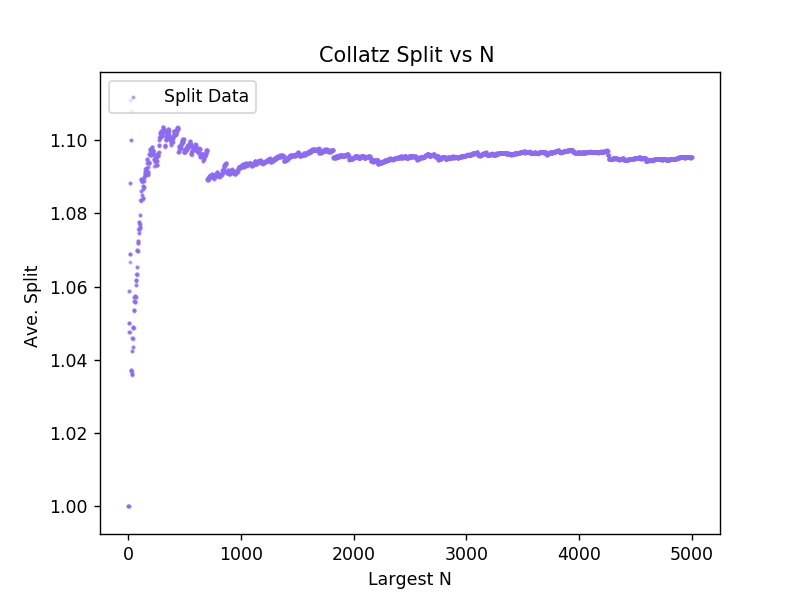

In [61]:
#====== SETTINGS
MAX_N = 5000
#====== Function to Calculate Average Split
def calc_ave_split(root_node):
    lengths = []
    root_node.preOrderTraversal(lambda n: lengths.append(len(n.children)) if len(n.children)!=0 else None)
    ave = sum(lengths)/len(lengths) if len(lengths)!=0 else None
    return ave

#====== Data Storage
x = []
y = []
#====== Init the calculation
root = TreeNode(1)
ref_cache = {root.value:root}# store Key: (value of tree item)  Value: Tree Node Reference
for k in tqdm.tqdm(range(1,MAX_N+1)):
    build_c_tree3(ref_cache,k)
    x.append(k)
    res = calc_ave_split(root)
    y.append(res if res!=None else res)
#====== Convert and Plot  
x = np.array(x)
y = np.array(y)
PlotUtil.PlotUtil.plot({'data':[x,y],"name":"Split Data"},x_name="Largest N", y_name="Ave. Split ",title="Collatz Split vs N ")